In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, FunctionTransformer

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import  BaggingRegressor
from xgboost import XGBRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('fitbit_dataset.csv')
df.head()

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [3]:
#checking null values
df.isnull().sum()

,0
Unnamed: 0,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0


In [4]:
df.describe()

,Unnamed: 0,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1373.000000,1.373000e+03,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,694.483613,4.782326e+09,7247.360524,5.194137,5.167036,0.128591,1.380670,0.541748,3.180153,0.001733,19.551347,13.502549,184.610342,993.426074,2264.449381
std,404.339894,2.381544e+09,5214.783821,3.988507,3.974632,0.695630,2.588989,0.873557,2.119602,0.007800,31.667869,26.605437,114.289153,314.794986,754.164188
min,0.000000,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,343.000000,2.320127e+09,3108.000000,2.140000,2.110000,0.000000,0.000000,0.000000,1.580000,0.000000,0.000000,0.000000,108.000000,729.000000,1793.000000
50%,693.000000,4.445115e+09,6910.000000,4.900000,4.900000,0.000000,0.080000,0.190000,3.230000,0.000000,2.000000,5.000000,195.000000,1058.000000,2114.000000
75%,1045.000000,6.962181e+09,10538.000000,7.480000,7.440000,0.000000,1.810000,0.780000,4.680000,0.000000,29.000000,18.000000,260.000000,1247.000000,2766.000000
max,1396.000000,8.877689e+09,36019.000000,28.030001,28.030001,6.727057,21.920000,6.480000,12.510000,0.110000,210.000000,660.000000,720.000000,1440.000000,4900.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1373 non-null   int64  
 1   Id                        1373 non-null   int64  
 2   ActivityDate              1373 non-null   object 
 3   TotalSteps                1373 non-null   int64  
 4   TotalDistance             1373 non-null   float64
 5   TrackerDistance           1373 non-null   float64
 6   LoggedActivitiesDistance  1373 non-null   float64
 7   VeryActiveDistance        1373 non-null   float64
 8   ModeratelyActiveDistance  1373 non-null   float64
 9   LightActiveDistance       1373 non-null   float64
 10  SedentaryActiveDistance   1373 non-null   float64
 11  VeryActiveMinutes         1373 non-null   int64  
 12  FairlyActiveMinutes       1373 non-null   int64  
 13  LightlyActiveMinutes      1373 non-null   int64  
 14  Sedentar

In [6]:
#dropped irrelevant columns
df = df.drop(columns=[
    'Unnamed: 0',
    'Id',
    'ActivityDate',
    'TrackerDistance',
    'LoggedActivitiesDistance',
    'SedentaryActiveDistance',
    'VeryActiveDistance',
    'ModeratelyActiveDistance',
    'LightActiveDistance'
])

In [7]:
df.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004,7.11,33,12,205,804,1819
1,17609,11.55,89,17,274,588,2154
2,12736,8.53,56,5,268,605,1944
3,13231,8.93,39,20,224,1080,1932
4,12041,7.85,28,28,243,763,1886


**Exploratory Data Analysis**

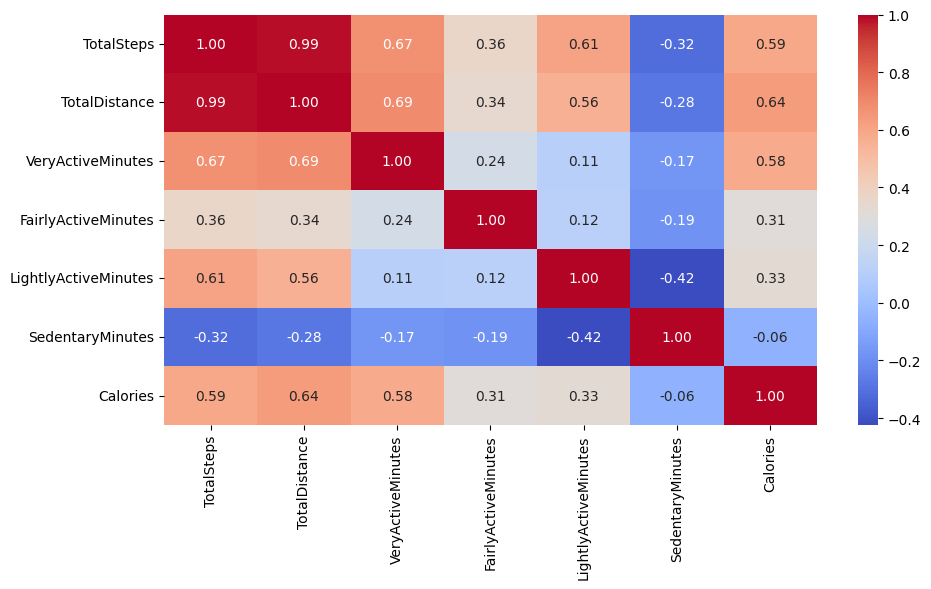

In [8]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

In [9]:
correlation_with_calories = corr_matrix['Calories'].sort_values(ascending=False)
print(correlation_with_calories)

Calories                1.000000
TotalDistance           0.636053
TotalSteps              0.591304
VeryActiveMinutes       0.582567
LightlyActiveMinutes    0.327038
FairlyActiveMinutes     0.310074
SedentaryMinutes       -0.061020
Name: Calories, dtype: float64


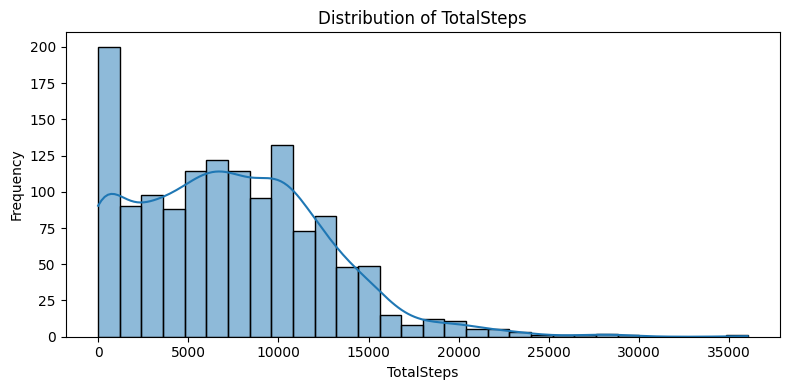

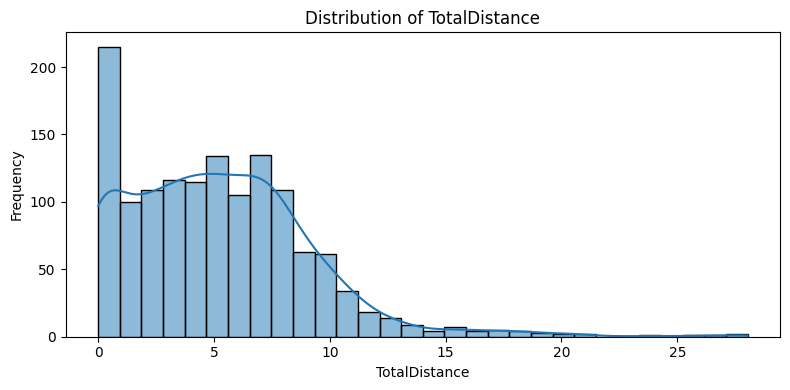

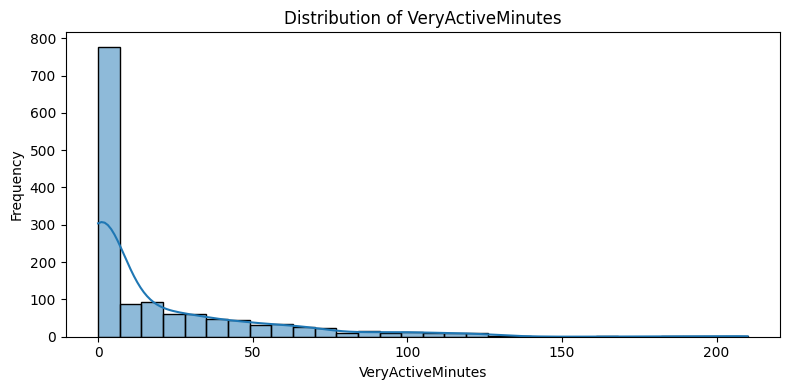

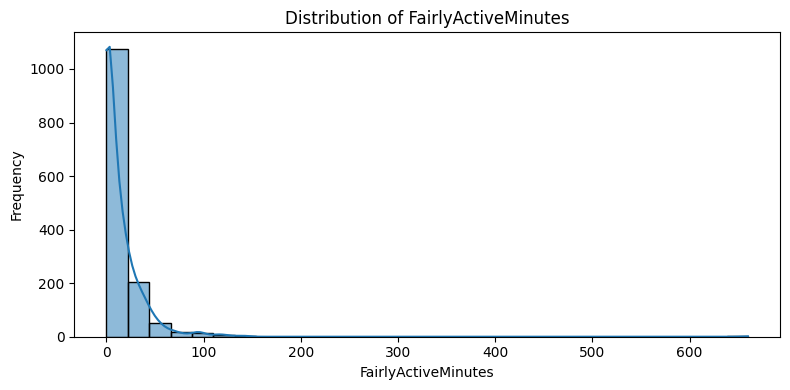

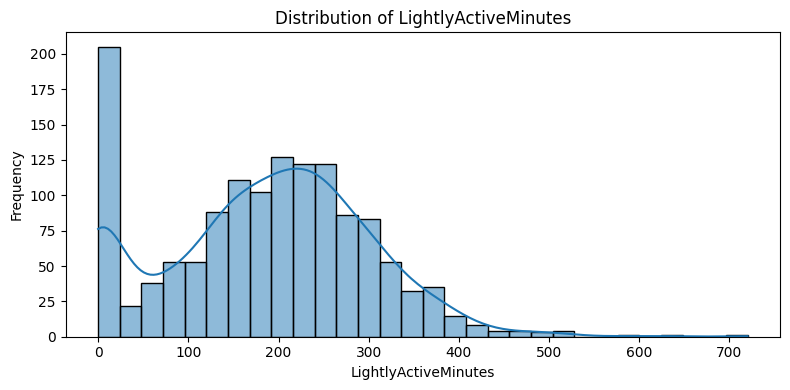

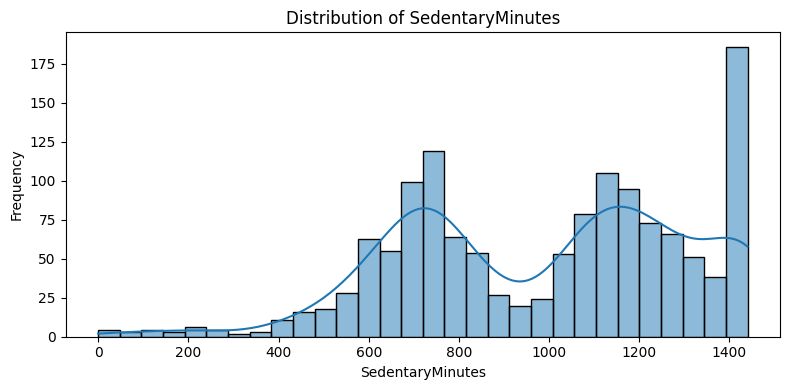

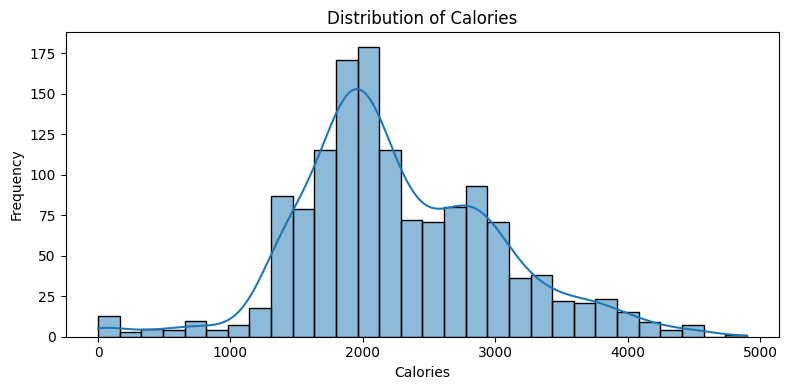

In [10]:
#distribution plots
features = [
    'TotalSteps',
    'TotalDistance',
    'VeryActiveMinutes',
    'FairlyActiveMinutes',
    'LightlyActiveMinutes',
    'SedentaryMinutes',
    'Calories'
]

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

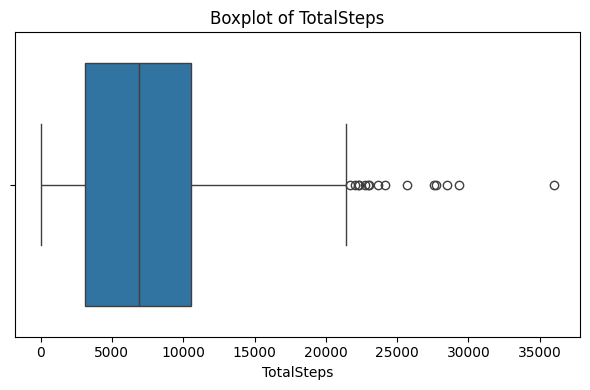

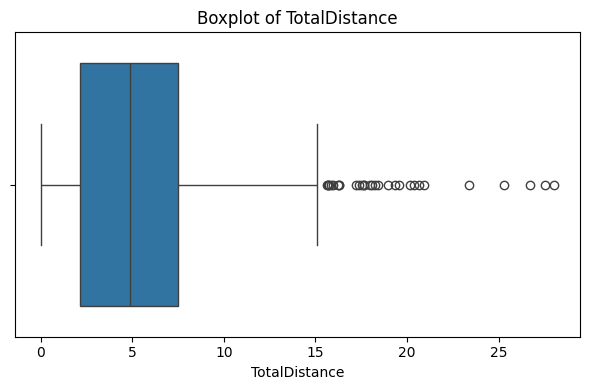

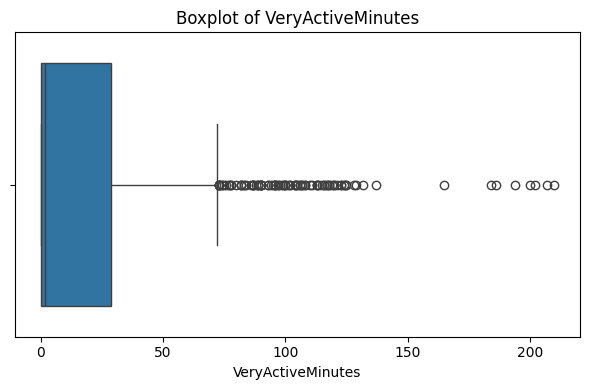

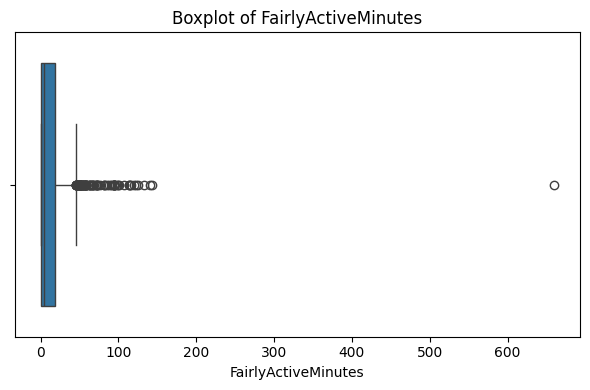

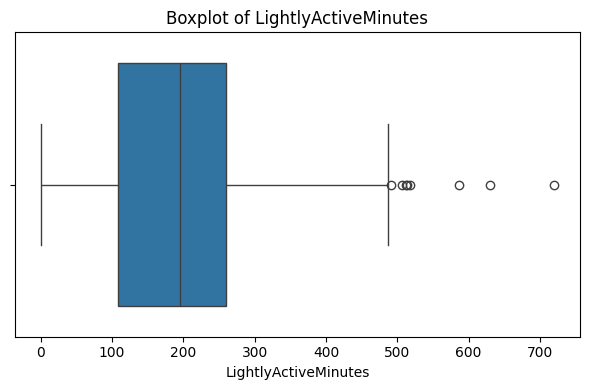

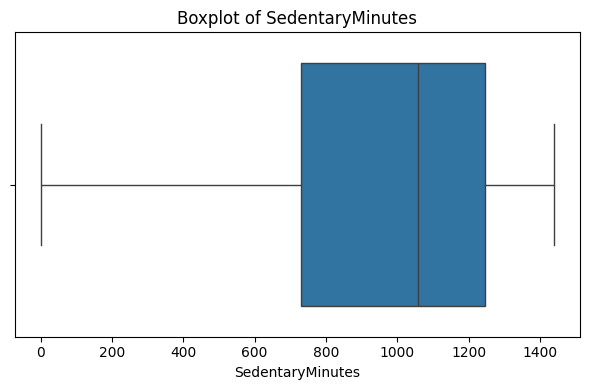

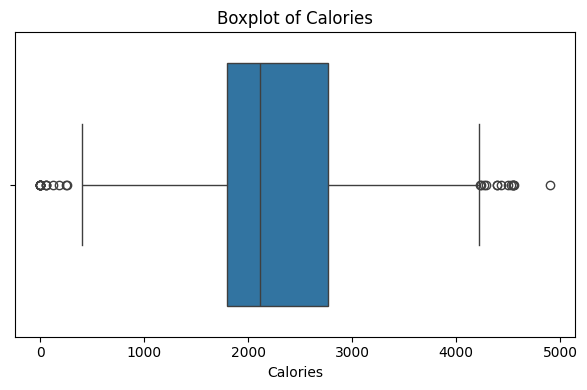

In [11]:
#boxplot
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

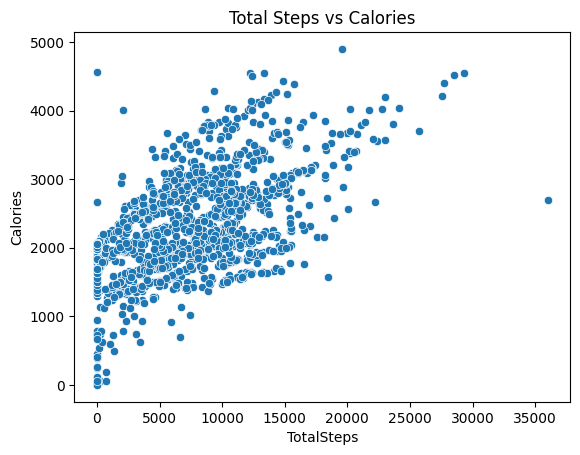

In [12]:
#scatter plot
sns.scatterplot(data=df, x='TotalSteps', y='Calories')
plt.title('Total Steps vs Calories')
plt.show()

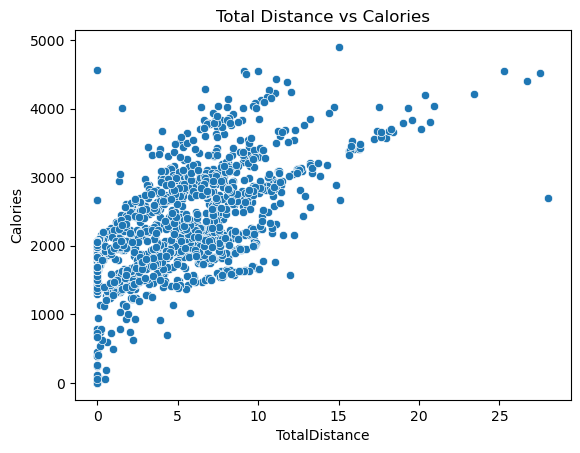

In [ ]:
sns.scatterplot(data=df, x='TotalDistance', y='Calories')
plt.title('Total Distance vs Calories')
plt.show()

**Model Training**

In [13]:
#splitting data for model training
X = df.drop('Calories', axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Linear Regression

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_lr = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Linear Regression metrics:
MAE: 388.6615381750603
MSE: 266882.0045967271
RMSE: 516.6062374736944
R² Score: 0.5275068438340289


In [18]:
comparison_df_lr = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_lr[:5].round(2)
})

print(comparison_df_lr)

   Actual Calories  Predicted Calories
0             2354             2021.10
1             2324             1914.04
2             2044             2141.72
3             3439             2500.99
4             1878             1752.32


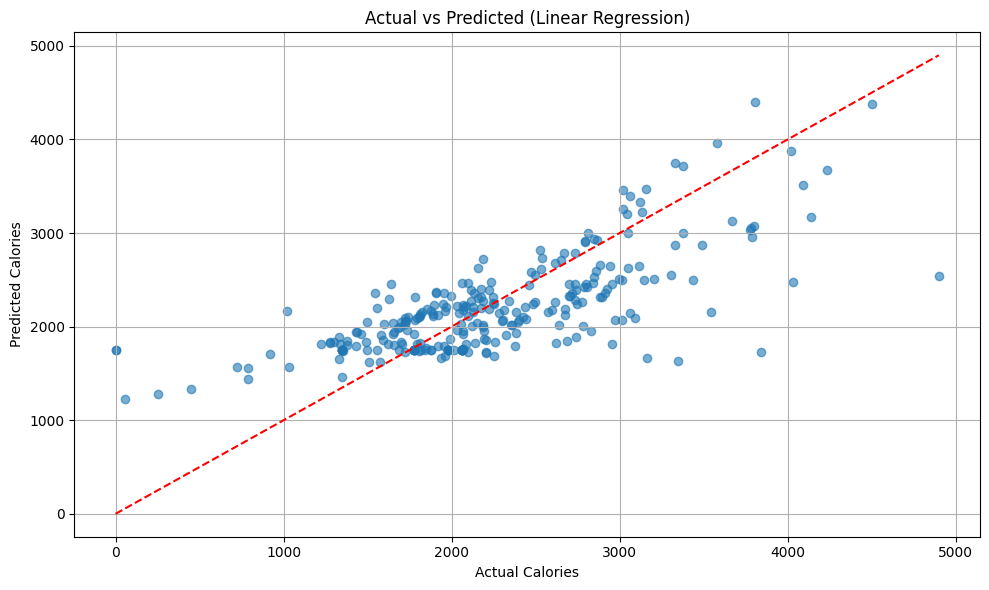

In [19]:
#actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.grid(True)
plt.show()

**Scaling Features**

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Ridge Regression

In [21]:
grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
    cv=5)
grid.fit(X_train_scaled, y_train)
print(f"Best alpha: {grid.best_params_['alpha']}")

Best alpha: 1


In [22]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [23]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Ridge Regression metrics:
MAE: 391.1293364761795
MSE: 266478.34084128565
RMSE: 516.2154015924802
R² Score: 0.5282214980952877


In [24]:
comparison_df_ridge = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_ridge[:5].round(2)
})
print(comparison_df_ridge)

   Actual Calories  Predicted Calories
0             2354             2012.84
1             2324             1912.74
2             2044             2169.33
3             3439             2492.39
4             1878             1750.69


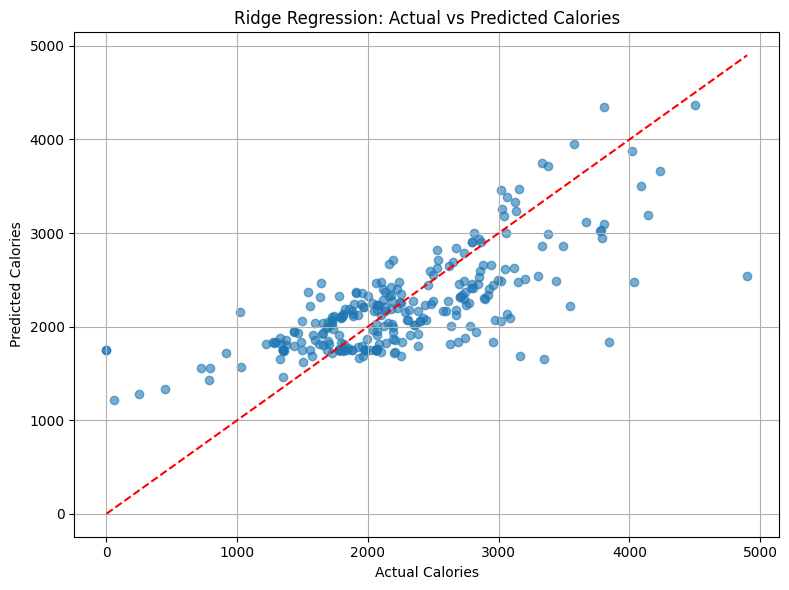

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Ridge Regression: Actual vs Predicted Calories')
plt.tight_layout()
plt.grid(True)
plt.show()

3. Lasso Regression

In [26]:
grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
    cv=5
)
grid.fit(X_train_scaled, y_train)
print(f"Best alpha: {grid.best_params_['alpha']}")

Best alpha: 1


In [27]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [30]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Lasso Regression metrics:
MAE: 390.6768088742336
MSE: 266589.7900993533
RMSE: 516.3233387126262
R² Score: 0.5280241861342347


In [29]:
#coefficient checking
feature_names = X_train.columns
lasso_coeffs = pd.Series(lasso_reg.coef_, index=feature_names)

print("\nLasso Coefficients:")
print(lasso_coeffs)

non_zero_features = lasso_coeffs[lasso_coeffs != 0]
print("\nFeatures selected (non-zero):")
print(non_zero_features)


Lasso Coefficients:
TotalSteps             -1408.649365
TotalDistance           1459.314519
VeryActiveMinutes        340.007232
FairlyActiveMinutes      168.593580
LightlyActiveMinutes     279.078286
SedentaryMinutes         117.492840
dtype: float64

Features selected (non-zero):
TotalSteps             -1408.649365
TotalDistance           1459.314519
VeryActiveMinutes        340.007232
FairlyActiveMinutes      168.593580
LightlyActiveMinutes     279.078286
SedentaryMinutes         117.492840
dtype: float64


In [31]:
comparison_df_lasso = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_lasso[:5].round(2)
})
print(comparison_df_lasso)

   Actual Calories  Predicted Calories
0             2354             2013.30
1             2324             1912.34
2             2044             2165.78
3             3439             2491.65
4             1878             1750.99


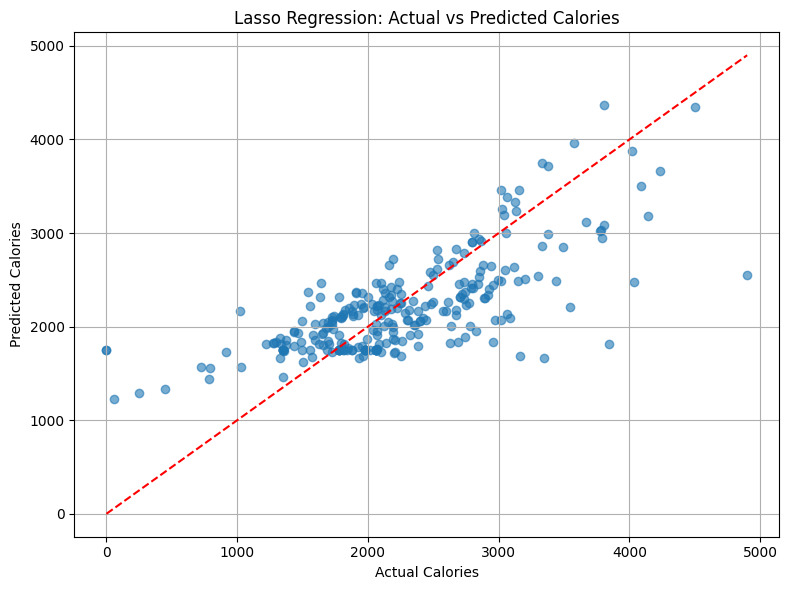

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Lasso Regression: Actual vs Predicted Calories')
plt.tight_layout()
plt.grid(True)
plt.show()

4. SVR

In [33]:
#Calculate skewness for each feature
skewness = X_train.apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness of features:")
print(skewness)

Skewness of features:
TotalSteps               0.686281
TotalDistance            1.217079
VeryActiveMinutes        2.242463
FairlyActiveMinutes     11.408464
LightlyActiveMinutes     0.106807
SedentaryMinutes        -0.322249
dtype: float64


In [34]:
svr = SVR(kernel='rbf')
transformer = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
preprocessing = Pipeline([
    ("log", transformer),
    ("standardize", StandardScaler()),
])

trans_data = preprocessing.fit_transform(X_train)
trans_df = pd.DataFrame(trans_data, columns=preprocessing.get_feature_names_out(), index=X_train.index) #get_feature_names_out() coz function Transformer doesn't rename cols
trans_df.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
529,0.076498,-0.478800,-0.972786,-1.056521,-0.062451,0.785684
243,-2.911127,-2.062322,-0.972786,-1.056521,-2.614999,0.913450
1310,0.452549,0.652260,-0.185290,1.689270,0.340118,0.519768
664,-0.869370,-1.870731,-0.972786,-1.056521,-0.975416,0.187283
745,0.471937,0.560833,0.636645,0.349650,0.742534,0.271411


In [35]:
'''param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1]
}'''

param_grid = {
    'C': [10, 100, 1000, 5000],
    'gamma': [0.1, 1, 5, 10]
}

grid_svr = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_svr.fit(trans_data, y_train)
print(f"Best SVR parameters: {grid_svr.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVR parameters: {'C': 5000, 'gamma': 0.1}


In [36]:
y_pred_svr = grid_svr.predict(preprocessing.transform(X_test))

mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print("\nSVR (higher gamma and C values) Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


SVR (higher gamma and C values) Metrics:
MAE: 329.5025752116856
MSE: 211811.96501908486
RMSE: 460.2303390902048
R² Score: 0.6250039262976557


In [37]:
comparison_df_svr = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_svr[:5].round(2)
})
print(comparison_df_svr)

   Actual Calories  Predicted Calories
0             2354             1878.89
1             2324             1807.90
2             2044             2231.65
3             3439             2425.76
4             1878             1819.90


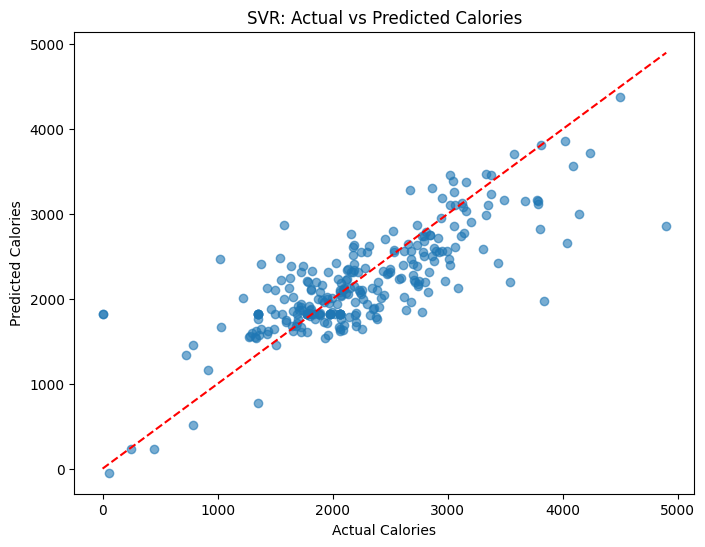

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('SVR: Actual vs Predicted Calories')
plt.show()

5. Decision Tree Regressor


In [48]:
tree_reg = DecisionTreeRegressor()

cv_opt = GridSearchCV(tree_reg,
                      param_grid={'max_depth': np.arange(start=2, stop=200)},
                      scoring='neg_root_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  9...
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [49]:
dt_reg=cv_opt.best_estimator_

In [50]:
y_train_pred = cv_opt.best_estimator_.predict(X_train)
y_test_pred = cv_opt.best_estimator_.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

388.4406937928148
496.2207326147095


In [51]:
y_pred_dt=y_test_pred
dt_predictions = y_pred_dt.copy()

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Decision Tree metrics:
MAE: 371.36446630204716
MSE: 246235.01547667905
RMSE: 496.2207326147095
R² Score: 0.5640606799362312


In [52]:
print("Best max_depth:", cv_opt.best_params_)

Best max_depth: {'max_depth': np.int64(7)}


In [53]:
#untuned tree-overfitting-no limit on depth
tree_reg_over = DecisionTreeRegressor(random_state=42)
tree_reg_over.fit(X_train, y_train)
y_train_pred = tree_reg_over.predict(X_train)
y_test_pred = tree_reg_over.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred)) #almost perfect on train data
print(root_mean_squared_error(y_test, y_test_pred))# performs worse on test
#it memorised the training data but failed to generalize it

150.840211445051
549.0392770034583


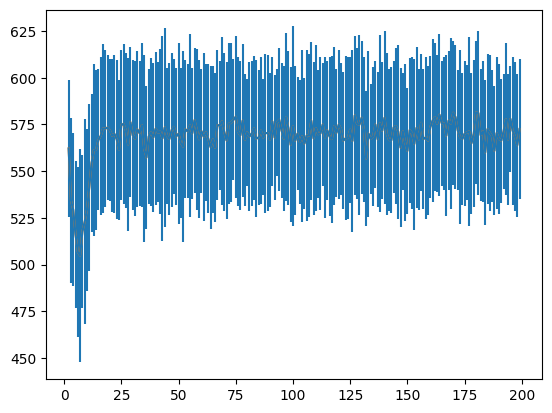

In [54]:
results_df = pd.DataFrame(cv_opt.cv_results_)
results_df['mean_test_score'] *= -1
results_df['mean_train_score'] *= -1
plt.errorbar(results_df['param_max_depth'], results_df['mean_test_score'], yerr=results_df['std_test_score'])
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'])
plt.show()

In [55]:
#!pip install graphviz

In [56]:
'''export_graphviz(
        cv_opt.best_estimator_,
        out_file="calories.dot",
        feature_names=X_train.columns,
        rounded=True,
        filled=True
    )

Source.from_file("calories.dot").render(filename='calories_best', format='jpeg', directory='.', view=False)
Source.from_file("calories.dot")'''

In [56]:
'''export_graphviz(
        tree_reg_over,
        out_file="calories.dot",
        feature_names=X_train.columns,
        rounded=True,
        filled=True
    )

Source.from_file("calories.dot").render(filename='calories_overfit', format='jpeg', directory='.', view=False)'''

In [57]:
comparison_df_dt = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_dt[:5].round(2)
})
print(comparison_df_dt)

   Actual Calories  Predicted Calories
0             2354             1967.80
1             2324             1967.80
2             2044             2016.19
3             3439             2282.90
4             1878             1659.78


6. Voting Regressor

In [58]:
voting_regressor=VotingRegressor(estimators=[('lr',lr_model ),('ridge',ridge_reg), ('svr', grid_svr), ('tree', dt_reg)])

In [59]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

In [60]:
voting_regressor.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=1)),
                            ('svr',
                             GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                                          param_grid={'C': [10, 100, 1000,
                                                            5000],
                                                      'gamma': [0.1, 1, 5, 10]},
                                          scoring='neg_mean_squared_error',
                                          verbose=1)),
                            ('tree',
                             DecisionTreeRegressor(max_depth=np.int64(7)))])

In [61]:
y_pred_voting = voting_regressor.predict(X_test_transformed)
voting_predictions = y_pred_voting.copy()

mae = mean_absolute_error(y_test, y_pred_voting)
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_voting)

print("Voting Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Voting Regression metrics:
MAE: 371.52115721202284
MSE: 233374.8608329886
RMSE: 483.0888746731688
R² Score: 0.5868285509493459


In [62]:
comparison_df_votingReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_voting[:5].round(2)
})
print(comparison_df_votingReg)

   Actual Calories  Predicted Calories
0             2354             1850.10
1             2324             1855.11
2             2044             2396.83
3             3439             2383.37
4             1878             1715.06


7. Random Forest Regression

In [65]:
#without gridsearch
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnf_pipeline = make_pipeline(scaler,rnd_reg)
rnf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_leaf_nodes=16, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [66]:
y_train_pred = rnf_pipeline.predict(X_train)
y_test_pred = rnf_pipeline.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

424.7475786068299
462.39302425364065


Randomforest with gridsearch

In [67]:
rnf_pipeline = make_pipeline(
    scaler,
    RandomForestRegressor(n_jobs=-1, random_state=42)
)

In [68]:
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 500],
    'randomforestregressor__max_leaf_nodes': [10, 16, 30, 50],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10]
}

In [69]:
grid_search = GridSearchCV(
    rnf_pipeline,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

In [70]:
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_leaf_nodes': 50, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 500}


In [74]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Train RMSE:", root_mean_squared_error(y_train, y_train_pred))
print("Test RMSE:", root_mean_squared_error(y_test, y_test_pred))

Train RMSE: 320.9361177220207
Test RMSE: 426.2363540653267


In [72]:
y_pred_best_model = best_model.predict(X_test)
best_model_predictions = y_pred_best_model.copy()

mae = mean_absolute_error(y_test, y_pred_best_model)
mse = mean_squared_error(y_test, y_pred_best_model)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_model)

print("Randomforest(Grid Search) Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Randomforest(Grid Search) Regression metrics:
MAE: 311.97540842297326
MSE: 181677.42952690256
RMSE: 426.23635406532674
R² Score: 0.678354701318293


In [73]:
comparison_df_best_model = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_best_model[:5].round(2)
})
print(comparison_df_best_model)

   Actual Calories  Predicted Calories
0             2354             1821.99
1             2324             1904.46
2             2044             2052.54
3             3439             2430.22
4             1878             1657.20


8. AdaBoosting

In [75]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),
                             n_estimators=30,
                             learning_rate=0.5,
                             random_state=42)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.5, n_estimators=30, random_state=42)

In [76]:
y_train_pred = ada_reg.predict(X_train)
y_test_pred = ada_reg.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

617.5194052987256
608.9655518054066


In [77]:
y_pred_ada = y_test_pred

In [78]:
adaBoostingRegressor_predictions = y_pred_ada.copy()

mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ada)

print("adaBoostingRegressor metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

adaBoostingRegressor metrics:
MAE: 473.0413484435921
MSE: 370839.04328566324
RMSE: 608.9655518054066
R² Score: 0.34345925549990797


In [79]:
comparison_df_adaReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_ada[:5].round(2)
})
print(comparison_df_adaReg)

   Actual Calories  Predicted Calories
0             2354             1722.47
1             2324             2061.07
2             2044             2744.00
3             3439             2745.27
4             1878             1672.07


AdaBoosting with Grid search

In [80]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid, cv=5,
                           scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                                         learning_rate=0.5, n_estimators=30,
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [81]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'estimator__max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 200}


In [82]:
best_ada_model = grid_search.best_estimator_

In [83]:
y_train_pred = best_ada_model.predict(X_train)
y_test_pred = best_ada_model.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

351.18797975424854
448.9123828555553


In [84]:
y_pred_best_ada = y_test_pred

In [85]:
adaBoostingRegressor_best_predictions = y_pred_best_ada.copy()

mae = mean_absolute_error(y_test, y_pred_best_ada)
mse = mean_squared_error(y_test, y_pred_best_ada)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_ada)

print("adaBoostingRegressor best metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

adaBoostingRegressor best metrics:
MAE: 340.76161155845494
MSE: 201522.32748105266
RMSE: 448.9123828555553
R² Score: 0.643220903210337


9. Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500,
                                 learning_rate=0.05, random_state=42)

gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          random_state=42)

In [87]:
y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

335.32862959313667
447.8439821972835


In [88]:
y_pred_gbrt = y_test_pred

In [89]:
gradientBoostingRegressor_predictions = y_pred_gbrt.copy()

mae = mean_absolute_error(y_test, y_pred_gbrt)
mse = mean_squared_error(y_test, y_pred_gbrt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbrt)

print("GradientBoostingRegressor metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

GradientBoostingRegressor metrics:
MAE: 335.2705246625584
MSE: 200564.23239032074
RMSE: 447.8439821972835
R² Score: 0.6449171336250143


In [90]:
comparison_df_gbrt = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_gbrt[:5].round(2)
})
print(comparison_df_votingReg)

   Actual Calories  Predicted Calories
0             2354             1850.10
1             2324             1855.11
2             2044             2396.83
3             3439             2383.37
4             1878             1715.06


Gradient Boosting with GridSearch

In [91]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=gbrt, param_grid=param_grid, cv=5,
                           scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 max_depth=2, n_estimators=500,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [92]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}


In [93]:
best_gboost_model = grid_search.best_estimator_

In [94]:
y_train_pred = best_gboost_model.predict(X_train)
y_test_pred = best_gboost_model.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

268.5809739161331
424.3515653287857


In [95]:
y_pred_best_gboost=y_test_pred

In [96]:
gradientBoostingRegressor_best_predictions = y_pred_best_gboost.copy()

mae = mean_absolute_error(y_test, y_pred_best_gboost)
mse = mean_squared_error(y_test, y_pred_best_gboost)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_gboost)

print("gradientBoostingRegressor best metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

gradientBoostingRegressor best metrics:
MAE: 313.55832420845803
MSE: 180074.25099699068
RMSE: 424.3515653287857
R² Score: 0.6811930001561641


10. XGBoosting Regressor

In [ ]:
#!pip install xgboost

In [97]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBRegressor(random_state=42)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5, n_jobs=-1, verbose=1)

grid_xgb.fit(X_train, y_train)

print(f"Best parameters: {grid_xgb.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [98]:
xgb_best = grid_xgb.best_estimator_

y_pred_xgb = xgb_best.predict(X_test)
xgb_predictions = y_pred_xgb.copy()
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

XGBoost Regression metrics:
MAE: 295.3179016113281
MSE: 173964.515625
RMSE: 417.09053648458627
R² Score: 0.6920098066329956


In [99]:
comparison_df_xgb = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_xgb[:5].round(2)
})
print(comparison_df_xgb)

   Actual Calories  Predicted Calories
0             2354         1845.140015
1             2324         1889.689941
2             2044         2101.889893
3             3439         2788.949951
4             1878         1636.479980


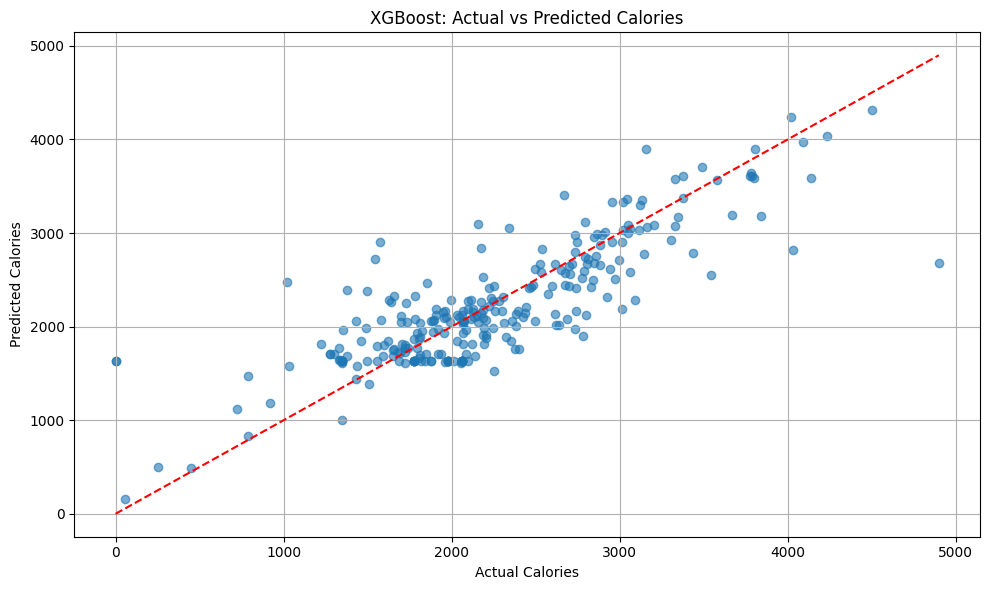

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('XGBoost: Actual vs Predicted Calories')
plt.grid(True)
plt.tight_layout()
plt.show()